# Performance of OLS Emulator

- This script shows the performance of Linear Regression with Ordinary Least Squares (OLS)

In [1]:
import xgboost as xgb
from xgboost import XGBRegressor
from sklearn import model_selection, metrics
from sklearn.model_selection import GridSearchCV, train_test_split
from sklearn.model_selection import cross_validate
from sklearn.metrics import mean_squared_error
from sklearn.preprocessing import StandardScaler
import pickle
import pandas as pd
import numpy as np
import time
import matplotlib.pyplot as plt
import gc
import statsmodels.api as sm

import warnings
warnings.filterwarnings('ignore')
warnings.simplefilter('ignore')

# Calculate squared_error
def squared_error(y_ori,y_pred):
    return np.sum((y_pred - y_ori) * (y_pred - y_ori))

# Calculate coefficient of determination
def coefficient_of_determination(y_ori,y_pred):
    """
    ref: https://en.wikipedia.org/wiki/Coefficient_of_determination
    """
    y_mean_pred = np.full(np.asarray(y_ori).shape, np.mean(y_ori)) 
    SSres = squared_error(y_ori, y_pred)
    SStot = squared_error(y_ori, y_mean_pred)
    return 1 - (SSres/SStot)

# Calculate index of agreement
def index_agreement(ori,pred):
    """
    ref: https://www.rforge.net/doc/packages/hydroGOF/d.html
    index of agreement
    input:
        pred: simulated
        ori: observed
    output:
        ia: index of agreement
    """
    ia = 1 -(np.sum((ori-pred)**2))/(np.sum(
        (np.abs(pred-np.mean(ori))+np.abs(ori-np.mean(ori)))**2))
    return ia

In [2]:
vari = ["DMS_SRF","H2O2_SRF","H2SO4_SRF","O3_SRF","SO2_SRF","SOAG_SRF",
        'Mass_so4','Mass_bc','Mass_ncl','Mass_dst','Mass_pom','Mass_soa',
        "T", "RELHUM", "SZA"]
ms = ['chi_b','chi_c','chi_h']
vari_ms = vari+ms

df_test_ori = pd.read_csv("../data/test.csv")
#df_test.describe()

df_train_ori = pd.read_csv("../data/train.csv")
#df_train.describe()

In [3]:
def predict_chi_ls(df_train, df_test, vari, chi_ls):
    X_train = df_train[vari]
    X_test = df_test[vari]

    scaler = StandardScaler()
    scaler.fit(X_train)
    X_train_new = scaler.transform(X_train)
    X_test_new = scaler.transform(X_test)
    X_test2 = sm.add_constant(X_test_new)

    for pred in chi_ls:
        print(pred)
        #y_train = df_train[pred]
        Y_ref = df_test[pred]
        reg=pickle.load(open("./linear_model/"+pred+".dat","rb"))
        df_predictions = reg.predict(X_test2)
        
        plt.figure(figsize=(10,10))
        plt.scatter(df_predictions,Y_ref,s = 6,color="purple",alpha=0.5)
        plt.plot([0,1],[0,1],color="red",alpha=0.6)
        plt.ylabel("Reference",fontsize=20)
        plt.xlabel("Prediction",fontsize=20)
        plt.xlim(0,1)
        plt.ylim(0,1)
        plt.xticks(fontsize=20)
        plt.yticks(fontsize=20)
        plt.show()
        
        print('The P-value is:',
              "{0:.3f}".format(reg.f_pvalue))
        print('The cc is:',
              "{0:.3f}".format(np.corrcoef(np.asarray(Y_ref),np.asarray(df_predictions))[0][1]))
        print('The coefficient of determination is:',
              "{0:.3f}".format(coefficient_of_determination(Y_ref,df_predictions)))
        print('The coefficient of determination (Using sklearn) is:', 
              "{0:.3f}".format(metrics.r2_score(Y_ref, df_predictions)))
        print('The index of agreement is:',
              "{0:.3f}".format(index_agreement(Y_ref,df_predictions)))
        print('The root mean squared error is:', 
              "{0:.3f}".format(np.sqrt(mean_squared_error(Y_ref, df_predictions))))
        print('The mean absolute error is:', 
              "{0:.3f}".format(metrics.mean_absolute_error(Y_ref, df_predictions)))
        print('The median absolute error is:', 
              "{0:.3f}".format(metrics.median_absolute_error(Y_ref, df_predictions)))
        print("####################################")
        print("\n")

## Apply the training data

chi_b


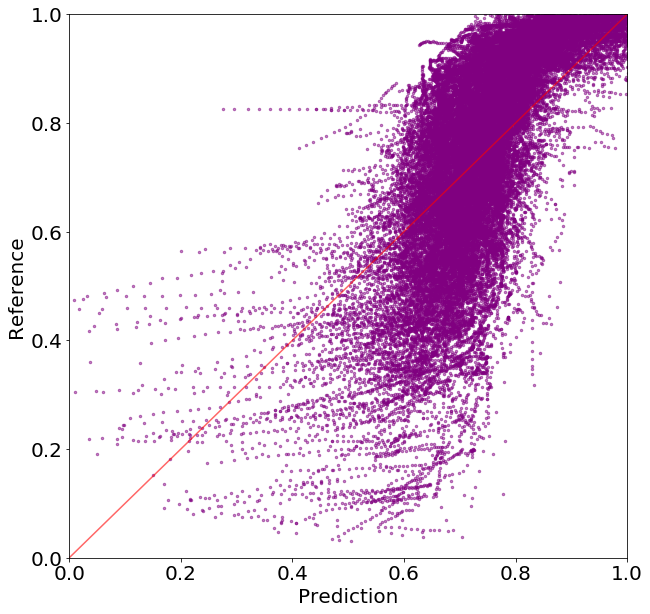

The P-value is: 0.000
The cc is: 0.673
The coefficient of determination is: 0.453
The coefficient of determination (Using sklearn) is: 0.453
The index of agreement is: 0.776
The root mean squared error is: 0.143
The mean absolute error is: 0.112
The median absolute error is: 0.095
####################################


chi_c


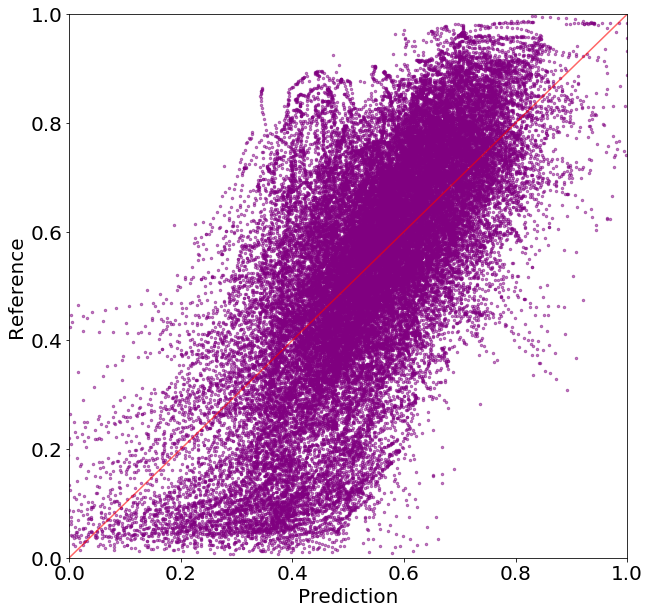

The P-value is: 0.000
The cc is: 0.692
The coefficient of determination is: 0.479
The coefficient of determination (Using sklearn) is: 0.479
The index of agreement is: 0.798
The root mean squared error is: 0.158
The mean absolute error is: 0.124
The median absolute error is: 0.101
####################################


chi_h


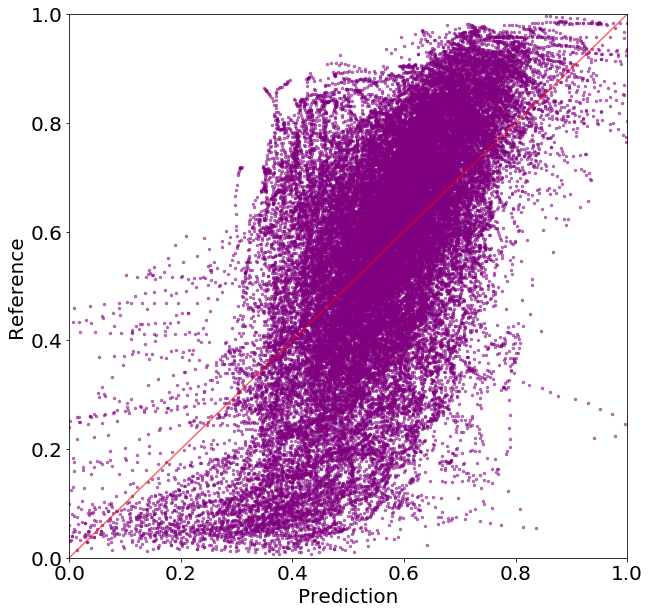

The P-value is: 0.000
The cc is: 0.634
The coefficient of determination is: 0.402
The coefficient of determination (Using sklearn) is: 0.402
The index of agreement is: 0.750
The root mean squared error is: 0.175
The mean absolute error is: 0.139
The median absolute error is: 0.117
####################################




In [4]:
predict_chi_ls(df_train=df_train_ori.dropna(), df_test=df_train_ori.dropna(), vari=vari, chi_ls=ms)

## Apply to testing data

chi_b


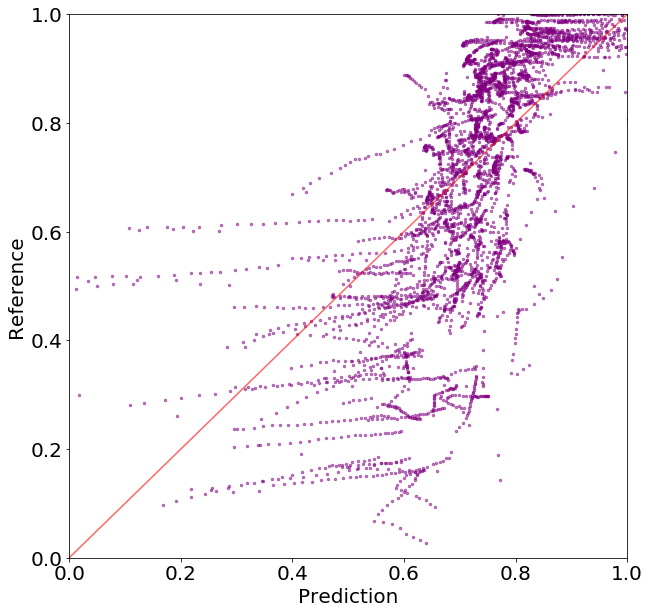

The P-value is: 0.000
The cc is: 0.676
The coefficient of determination is: 0.440
The coefficient of determination (Using sklearn) is: 0.440
The index of agreement is: 0.782
The root mean squared error is: 0.175
The mean absolute error is: 0.135
The median absolute error is: 0.112
####################################


chi_c


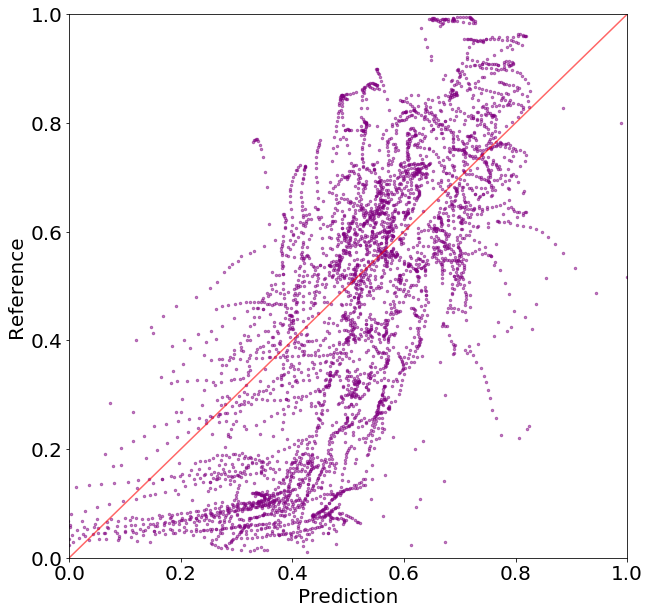

The P-value is: 0.000
The cc is: 0.685
The coefficient of determination is: 0.447
The coefficient of determination (Using sklearn) is: 0.447
The index of agreement is: 0.786
The root mean squared error is: 0.196
The mean absolute error is: 0.159
The median absolute error is: 0.137
####################################


chi_h


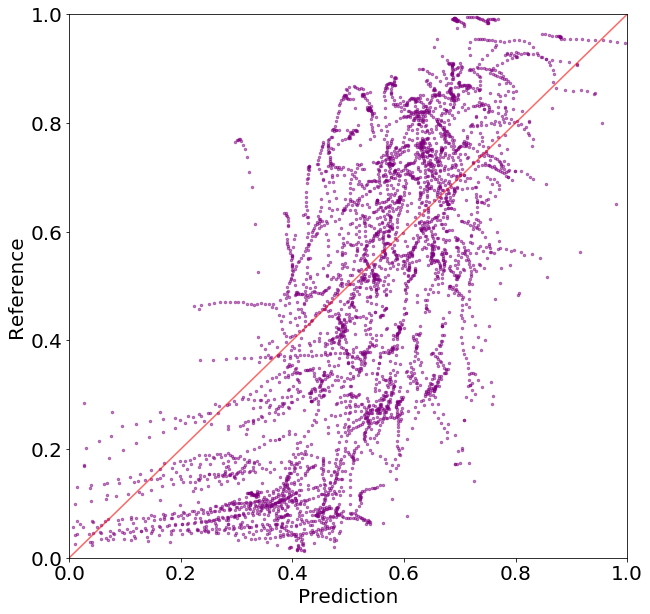

The P-value is: 0.000
The cc is: 0.659
The coefficient of determination is: 0.404
The coefficient of determination (Using sklearn) is: 0.404
The index of agreement is: 0.767
The root mean squared error is: 0.212
The mean absolute error is: 0.173
The median absolute error is: 0.153
####################################




In [5]:
predict_chi_ls(df_train=df_train_ori.dropna(), df_test=df_test_ori.dropna(), vari=vari, chi_ls=ms)